In [4]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [5]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [6]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [7]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [8]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 121kB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 2.7MB 42.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-13 23:43:22--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.0, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [39]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [10]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
from tqdm import tqdm

In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("public_test.csv")

In [69]:
train_data

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [0]:
from konlpy.tag import Mecab
from konlpy.tag import Okt
okt = Okt()
mecab = Mecab()

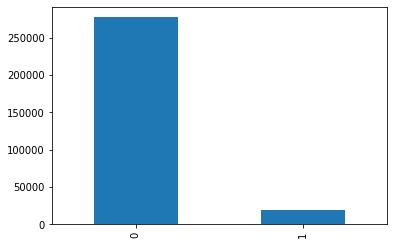

In [71]:
train_data['smishing'].value_counts().plot(kind='bar')

In [61]:
print(train_data.groupby('smishing').size().reset_index(name='count'))

   smishing   count
0         0  277242
1         1   18703


In [62]:
from tqdm import tqdm

positive_indexs = []

for i in tqdm(range(len(train_data['smishing']))):
  if train_data['smishing'].iloc[i] == 0:
    positive_indexs.append(i)

100%|██████████| 295945/295945 [00:03<00:00, 79238.56it/s]


In [63]:
positive_df = train_data.loc[positive_indexs]
positive_df

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [0]:
positive_df['len'] = [0] * 277242

In [0]:
for i in tqdm(range(len(positive_df['smishing']))):
  positive_df['len'].iloc[i] = len(positive_df['text'].iloc[i])

  0%|          | 0/277242 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 277242/277242 [41:08<00:00, 112.31it/s]


In [0]:
positive_df

,id,year_month,text,smishing,len
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,24
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,37
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,81
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,174
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,40
...,...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0,168
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0,33
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0,97
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0,66


In [52]:
positive_df_drop = positive_df.dropna()
positive_df_drop

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [0]:
positive_df_desen = positive_df.sort_values(by=['len'], axis=0, ascending=False)
positive_df_desen

,id,year_month,text,smishing,len
108190,125798,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1498
102385,119274,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1478
115615,134308,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1388
107676,125214,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377
112894,131196,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377
...,...,...,...,...,...
237368,269744,2018-05,행복,0,2
141055,162236,2017-09,보험,0,2
138978,159883,2017-09,고객,0,2
195029,222336,2018-01,1,0,1


In [0]:
positive_df_desen['clear_text'] = [0] * 277242

In [0]:
for i in tqdm(range(277242)):
  positive_df_desen['clear_text'].iloc[i] = positive_df_desen['text'].iloc[i].replace('XXX','')

  0%|          | 0/277242 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 277242/277242 [1:12:13<00:00, 63.97it/s]


In [0]:
positive_df_desen = pd.read_csv("positive_df.csv")

In [65]:
positive_df_desen

,id,year_month,text,smishing,len,clear_text,len2
0,125798,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1498,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,0
1,119274,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1478,고객님안녕하십니까?어제 업무를 도와드린 국민은행 상인역지점 박승희입니다.항상 저희...,0
2,134308,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1388,고객님안녕하십니까?어제 업무를 도와 드린 국민은행 상인역지점 박승희입니다.바쁘신 ...,0
3,125214,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?주말은 잘 보냈는지요?금요일 업무처리를 도와드린 국민은행 상인역...,0
4,131196,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,0
...,...,...,...,...,...,...,...
277237,269744,2018-05,행복,0,2,행복,0
277238,162236,2017-09,보험,0,2,보험,0
277239,159883,2017-09,고객,0,2,고객,0
277240,222336,2018-01,1,0,1,1,0


In [54]:
positive_df_desen.index

Int64Index([125798, 119274, 134308, 125214, 131196, 129377, 111275, 124869,
            121618, 167625,
            ...
            149542, 125522, 205124, 147557, 125999, 269744, 162236, 159883,
            222336, 303496],
           dtype='int64', length=277242)

In [17]:
positive_df_desen = pd.read_csv("positive_df.csv")
positive_df_desen

,id,year_month,text,smishing,len,clear_text,len2
0,125798,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1498,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,0
1,119274,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1478,고객님안녕하십니까?어제 업무를 도와드린 국민은행 상인역지점 박승희입니다.항상 저희...,0
2,134308,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1388,고객님안녕하십니까?어제 업무를 도와 드린 국민은행 상인역지점 박승희입니다.바쁘신 ...,0
3,125214,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?주말은 잘 보냈는지요?금요일 업무처리를 도와드린 국민은행 상인역...,0
4,131196,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,0
...,...,...,...,...,...,...,...
277237,269744,2018-05,행복,0,2,행복,0
277238,162236,2017-09,보험,0,2,보험,0
277239,159883,2017-09,고객,0,2,고객,0
277240,222336,2018-01,1,0,1,1,0


In [0]:
# positive_df_desen.to_csv('positive_df.csv', index=False, encoding='utf-8')

In [0]:
positive_df_desen['len2'] = [0] * len(positive_df_desen['len'])

In [19]:
for i in tqdm(range(len(positive_df_desen['smishing']))):
  positive_df_desen['len2'].iloc[i] = len(positive_df_desen['clear_text'].iloc[i])

  0%|          | 0/277242 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 277242/277242 [41:06<00:00, 112.40it/s]


In [0]:
positive_df_desen.to_csv('positive_df_2.csv', index=False, encoding='utf-8')

In [66]:
positive_df_desen = pd.read_csv("positive_df_2.csv")
positive_df_desen

,id,year_month,text,smishing,len,clear_text,len2
0,125798,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1498,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,367
1,119274,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1478,고객님안녕하십니까?어제 업무를 도와드린 국민은행 상인역지점 박승희입니다.항상 저희...,362
2,134308,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1388,고객님안녕하십니까?어제 업무를 도와 드린 국민은행 상인역지점 박승희입니다.바쁘신 ...,338
3,125214,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?주말은 잘 보냈는지요?금요일 업무처리를 도와드린 국민은행 상인역...,336
4,131196,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,336
...,...,...,...,...,...,...,...
277237,269744,2018-05,행복,0,2,행복,2
277238,162236,2017-09,보험,0,2,보험,2
277239,159883,2017-09,고객,0,2,고객,2
277240,222336,2018-01,1,0,1,1,1


In [0]:
pos_new_index = []
for i in range(277242):
  pos_new_index.append(i)

positive_df_desen.index = pos_new_index

In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [68]:
negative_indexs = []

for i in tqdm(range(len(train_data['smishing']))):
  if train_data['smishing'].iloc[i] == 1:
    negative_indexs.append(i)

100%|██████████| 295945/295945 [00:03<00:00, 81225.85it/s]


In [69]:
len(negative_indexs)

18703

In [70]:
nega_df = train_data.loc[negative_indexs]
nega_df

,id,year_month,text,smishing
9,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1
23,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1
31,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1
40,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1
50,58,2017-01,(광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...,1
...,...,...,...,...
295927,336357,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1
295932,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1
295934,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1
295936,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1


In [0]:
nega_df['len'] = [0] * 18703
nega_df['clear_text'] = [''] * 18703
nega_df['len2'] = [0] * 18703

In [72]:
nega_df

,id,year_month,text,smishing,len,clear_text,len2
9,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,0,,0
23,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,0,,0
31,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,0,,0
40,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,0,,0
50,58,2017-01,(광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...,1,0,,0
...,...,...,...,...,...,...,...
295927,336357,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,0,,0
295932,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,0,,0
295934,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,0,,0
295936,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,0,,0


In [73]:
for i in tqdm(range(18703)):
  nega_df['len'].iloc[i] = len(nega_df['text'].iloc[i])

  0%|          | 0/18703 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 18703/18703 [00:19<00:00, 977.02it/s]


In [74]:
nega_df_desen = nega_df.sort_values(by=['len'], axis=0, ascending=False)
nega_df_desen

,id,year_month,text,smishing,len,clear_text,len2
4406,4877,2017-01,HTMLHEADHEADBODYBR(광고)신용협동조합nbXXX안내brbrXXX세요br...,1,1230,,0
4697,5201,2017-01,(광고)XXX(광고)XXX시련이 있더라도 기회입니다.로 바뀔 수 있습니다XXX고객님...,1,1161,,0
25391,29755,2017-03,(광고)XXX(광고)XXX현명한 대출과 현명한 신용관리어느새 성큼 다가온 3월 겨울...,1,1161,,0
23107,27090,2017-03,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1161,,0
2972,3286,2017-01,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1160,,0
...,...,...,...,...,...,...,...
440,483,2017-01,(광고)XXX신년특별빠르게천만원월39000원통화1번(무료거부XXX-XXX-XXX),1,45,,0
1444,1586,2017-01,(광고)XXX신규상품빠르게천만원월39000원통화1번(무료거부XXX-XXX-XXX),1,45,,0
218022,247799,2018-04,XXXXXX702-61-050500000출XXX150641140418 09:42,1,44,,0
282717,321467,2018-11,(주)XXX 채권수임사 중앙신XXX입니다 연락바랍니다.XX-XXX-XXX,1,40,,0


In [75]:
for i in tqdm(range(18703)):
  nega_df_desen['clear_text'].iloc[i] = nega_df_desen['text'].iloc[i].replace('XXX','')

  0%|          | 0/18703 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 18703/18703 [00:15<00:00, 1192.19it/s]


In [76]:
for i in tqdm(range(18703)):
  nega_df_desen['len2'].iloc[i] = len(nega_df_desen['clear_text'].iloc[i])

  0%|          | 0/18703 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 18703/18703 [00:19<00:00, 976.09it/s]


In [77]:
nega_df_desen

,id,year_month,text,smishing,len,clear_text,len2
4406,4877,2017-01,HTMLHEADHEADBODYBR(광고)신용협동조합nbXXX안내brbrXXX세요br...,1,1230,HTMLHEADHEADBODYBR(광고)신용협동조합nb안내brbr세요br하루하루nb...,879
4697,5201,2017-01,(광고)XXX(광고)XXX시련이 있더라도 기회입니다.로 바뀔 수 있습니다XXX고객님...,1,1161,(광고)(광고)시련이 있더라도 기회입니다.로 바뀔 수 있습니다고객님들 곁에서 시련이...,1104
25391,29755,2017-03,(광고)XXX(광고)XXX현명한 대출과 현명한 신용관리어느새 성큼 다가온 3월 겨울...,1,1161,(광고)(광고)현명한 대출과 현명한 신용관리어느새 성큼 다가온 3월 겨울을 맞아 당...,1119
23107,27090,2017-03,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1161,(광고)(광고)B더 가까이 더 큰 혜택 B하고 싶은 것을 하고 좋은 것만 누리고 더...,1098
2972,3286,2017-01,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1160,(광고)(광고)B더 가까이 더 큰 혜택 B하고 싶은 것을 하고 좋은 것만 누리고 더...,1097
...,...,...,...,...,...,...,...
440,483,2017-01,(광고)XXX신년특별빠르게천만원월39000원통화1번(무료거부XXX-XXX-XXX),1,45,(광고)신년특별빠르게천만원월39000원통화1번(무료거부--),33
1444,1586,2017-01,(광고)XXX신규상품빠르게천만원월39000원통화1번(무료거부XXX-XXX-XXX),1,45,(광고)신규상품빠르게천만원월39000원통화1번(무료거부--),33
218022,247799,2018-04,XXXXXX702-61-050500000출XXX150641140418 09:42,1,44,702-61-050500000출150641140418 09:42,35
282717,321467,2018-11,(주)XXX 채권수임사 중앙신XXX입니다 연락바랍니다.XX-XXX-XXX,1,40,(주) 채권수임사 중앙신입니다 연락바랍니다.XX--,28


In [0]:
new_index = []
for i in range(18703):
  new_index.append(i)

In [85]:
posi_df_densen = positive_df_desen.loc[new_index]
posi_df_densen

,id,year_month,text,smishing,len,clear_text,len2
0,125798,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1498,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,367
1,119274,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1478,고객님안녕하십니까?어제 업무를 도와드린 국민은행 상인역지점 박승희입니다.항상 저희...,362
2,134308,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1388,고객님안녕하십니까?어제 업무를 도와 드린 국민은행 상인역지점 박승희입니다.바쁘신 ...,338
3,125214,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?주말은 잘 보냈는지요?금요일 업무처리를 도와드린 국민은행 상인역...,336
4,131196,2017-06,XXX XXX고XXX객XXX님XXX안XXX녕XXX하XXX십XXX니XXX까XXX?XX...,0,1377,고객님안녕하십니까?오늘 업무를 도와 드린 국민은행 상인역지점 입니다.바쁘신 와중에...,336
...,...,...,...,...,...,...,...
18698,147704,2017-08,XXX 고객님 안녕하세요.저희 XXX은행 퇴직연금을 거래해 주셔서 감사드립니다.고객...,0,381,고객님 안녕하세요.저희 은행 퇴직연금을 거래해 주셔서 감사드립니다.고객님의 소중한...,348
18699,208015,2017-11,XXX 고객님안녕하세요. XXX은행 내손동지점 XXX입니다.벌써 한 해가 저물어가는...,0,381,고객님안녕하세요. 은행 내손동지점 입니다.벌써 한 해가 저물어가는 쌀쌀한 11월 ...,366
18700,54047,2017-04,나만 몰랐던 포인트 알뜰히 챙기는 방법!XXX금융그룹 통합멤버십 Liiv Mate에...,0,381,나만 몰랐던 포인트 알뜰히 챙기는 방법!금융그룹 통합멤버십 Liiv Mate에서 내...,342
18701,191401,2017-10,항상 XXX은행 과천지점을 이용해주시는 고객님께 깊은 감사의 말씀을 드립니다.저희 ...,0,381,항상 은행 과천지점을 이용해주시는 고객님께 깊은 감사의 말씀을 드립니다.저희 과천지...,342


In [0]:
nega_df_desen.index = new_index
posi_df_densen.index = new_index

In [88]:
new_df = pd.concat([nega_df_desen, posi_df_densen])
new_df

,id,year_month,text,smishing,len,clear_text,len2
0,4877,2017-01,HTMLHEADHEADBODYBR(광고)신용협동조합nbXXX안내brbrXXX세요br...,1,1230,HTMLHEADHEADBODYBR(광고)신용협동조합nb안내brbr세요br하루하루nb...,879
1,5201,2017-01,(광고)XXX(광고)XXX시련이 있더라도 기회입니다.로 바뀔 수 있습니다XXX고객님...,1,1161,(광고)(광고)시련이 있더라도 기회입니다.로 바뀔 수 있습니다고객님들 곁에서 시련이...,1104
2,29755,2017-03,(광고)XXX(광고)XXX현명한 대출과 현명한 신용관리어느새 성큼 다가온 3월 겨울...,1,1161,(광고)(광고)현명한 대출과 현명한 신용관리어느새 성큼 다가온 3월 겨울을 맞아 당...,1119
3,27090,2017-03,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1161,(광고)(광고)B더 가까이 더 큰 혜택 B하고 싶은 것을 하고 좋은 것만 누리고 더...,1098
4,3286,2017-01,(광고)XXX(광고)XXXBXXX더 가까이 더 큰 혜택 XXXBXXX하고 싶은 것을...,1,1160,(광고)(광고)B더 가까이 더 큰 혜택 B하고 싶은 것을 하고 좋은 것만 누리고 더...,1097
...,...,...,...,...,...,...,...
18698,147704,2017-08,XXX 고객님 안녕하세요.저희 XXX은행 퇴직연금을 거래해 주셔서 감사드립니다.고객...,0,381,고객님 안녕하세요.저희 은행 퇴직연금을 거래해 주셔서 감사드립니다.고객님의 소중한...,348
18699,208015,2017-11,XXX 고객님안녕하세요. XXX은행 내손동지점 XXX입니다.벌써 한 해가 저물어가는...,0,381,고객님안녕하세요. 은행 내손동지점 입니다.벌써 한 해가 저물어가는 쌀쌀한 11월 ...,366
18700,54047,2017-04,나만 몰랐던 포인트 알뜰히 챙기는 방법!XXX금융그룹 통합멤버십 Liiv Mate에...,0,381,나만 몰랐던 포인트 알뜰히 챙기는 방법!금융그룹 통합멤버십 Liiv Mate에서 내...,342
18701,191401,2017-10,항상 XXX은행 과천지점을 이용해주시는 고객님께 깊은 감사의 말씀을 드립니다.저희 ...,0,381,항상 은행 과천지점을 이용해주시는 고객님께 깊은 감사의 말씀을 드립니다.저희 과천지...,342


In [90]:
new_df_desen = new_df.sort_values(by=['id'], axis=0, ascending=True)
new_df_desen

,id,year_month,text,smishing,len,clear_text,len2
4737,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878
3299,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743
17695,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363
3315,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914
3439,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904
...,...,...,...,...,...,...,...
1739,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013
5359,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893
16419,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444
12113,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814


In [0]:
# new_df_desen.to_csv("model_kb_dacon01_trainset.csv", index=False, encoding='utf-8')

In [0]:
new_df_desen = pd.read_csv("model_kb_dacon01_trainset.csv")

In [73]:
new_df_desen

,id,year_month,text,smishing,len,clear_text,len2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904
...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814


In [0]:
X_train = new_df_desen['clear_text']

In [76]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [77]:
new_test_df = test_data
new_test_df

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [78]:
new_test_df['clear_text'] = [''] * 1626
new_test_df

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,


In [79]:
for i in tqdm(range(len(new_test_df['id']))):
  new_test_df['clear_text'].iloc[i] = new_test_df['text'].iloc[i].replace('XXX', '')
new_test_df

  0%|          | 0/1626 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 1626/1626 [00:00<00:00, 3045.46it/s]


,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


In [0]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(new_df_desen['clear_text']))):
  temp_X = []
  temp_X = okt.morphs(new_df_desen['clear_text'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

In [104]:
X_test = []
for i in tqdm(range(len(new_test_df['clear_text']))):
  temp_X = []
  temp_X = okt.morphs(new_test_df['clear_text'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)


100%|██████████| 1626/1626 [00:33<00:00, 48.53it/s]

In [105]:
print(X_train[:3])

[['(', '광고', ')', 'Ba', '고객', '님', '들다', '뒤', '엔', '언제나', '새롭다', '마음가짐', '새롭다', '준비', '.', '당', '행', '상품', '자격', '기준', '심사', '기준', '완화', '되어다', '상품', '대해', '간단하다', '상품', '정보', '전달', '드리다', '.', '수신', '을', '희망', '않다', '경우', '에는', '거부', '라는', '답장', '을', '주시', '면', 'KISA', '수신', '거부', '목록', '등록', '을', '시키다', '두', '번', '다시', '발송', '되다', '않다', '조치', '취', '해드리다', '.', '신청', '방법', ':', '--', '터치', '문자', '로', '상담', '또는', '00시', '00분', '상담', '이라고', '답장', '을', '보내다', '전화', '주시', '면', '친절하다', '안전하다', '상담', '도움', '드리다', '.', '카카오', '톡', '상담', '서비스', '시행', '중', 'citibankloan', '친구', '추가', '후', '상담', '신청', '이렇다', '분', '께', '권', '해드리다', '.', '1', '.', '시중', '은행권', '에서', '기존', '한도', '모두', '사용', '중', '이신', '분', '.', '2', '.', '기', '대출', '원리금', '균등', '방식', '인하다', '월', '불입', '금액', '부담스럽다', '분', '.', '3', '.', '총', '채무', '금액', '작다', '채', '무겁다', '많다', '관리', '안', '되다', '고객', '님', '들다', '말씀드리다', '.', '높다', '금리', '때문', '힘들다', '느끼다', '때', '대출', '필요하다', '때', '언제나', '고객', '님', '들다', '뒤', '에서', '든든하다', '파트너', '로서

In [106]:
print(X_test[:3])

[['고객', '님', '!', '안녕하다', '?', '새롭다', '시작', '주', '행복', '가득하다', '기원', '.', '지난주', '글로벌', '증시', '파월', '밉다', '연', '준', '의장', '통화정책', '대해', '완화', '적', '인', '태도', '변화', '보이다', '것', '주초', '투자', '심리', '개선', '이어지다', '크다', '폭', '상승', '마감', '.', '더불다', '밉다', '중', '차관', '급', '무역', '협상', '순', '조', '롭', '게', '진행', '되다', '점도', '긍정', '적', '이다', '.', '원', '달러', '환율', '주간', '7.5원', '하락', '가운데', '외국인', '투자자', '국내', '증시', '순', '매수', '규모', '8천억', '을', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '.', '금주', '시장', '미국', '금융', '주', '실적', '발표', '시작', '본격', '적', '인', '실적', '시즌', '진입', '되다', '.', '지난주', '애플', '삼성', '전자', '등', '주요', '기업', '1분', '기', '실적', '전망', '하향', '조정', '있다', '점', '을', '참고', '다', '면', '올해', '글로벌', '성장', '둔화', '기', '조속', '에서', '기업', '순', '익', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '.', '주', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '.', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '.', '감사하다', '.', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점'

In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [108]:
print(X_train[:3])

[[4, 29, 3, 3041, 15, 20, 236, 1703, 1400, 1289, 513, 3900, 513, 730, 1, 209, 277, 6, 82, 142, 430, 142, 408, 103, 6, 185, 417, 6, 204, 636, 10, 1, 54, 2, 147, 50, 76, 283, 27, 310, 119, 2, 47, 39, 1066, 54, 27, 541, 239, 2, 184, 510, 213, 327, 196, 12, 50, 284, 678, 85, 1, 21, 62, 5, 30, 982, 46, 13, 14, 129, 483, 491, 14, 130, 119, 2, 132, 64, 47, 39, 203, 329, 14, 109, 10, 1, 463, 460, 14, 80, 363, 71, 1356, 313, 51, 104, 14, 21, 644, 22, 122, 125, 85, 1, 19, 1, 190, 139, 28, 168, 18, 237, 75, 71, 385, 22, 1, 23, 1, 187, 9, 98, 114, 68, 121, 118, 706, 69, 422, 22, 1, 26, 1, 262, 95, 69, 261, 452, 1398, 66, 81, 102, 12, 15, 20, 236, 2051, 1, 163, 8, 415, 1462, 1385, 272, 9, 171, 272, 1289, 15, 20, 236, 1703, 28, 584, 1779, 2065, 10, 1, 209, 277, 6, 253, 19, 1, 209, 277, 148, 67, 38, 16, 1, 23, 1, 190, 139, 53, 163, 18, 1, 26, 1, 120, 43, 175, 506, 141, 48, 38, 16, 1, 60, 1, 40, 66, 40, 31, 6, 63, 16, 1, 116, 1, 98, 114, 68, 2, 61, 36, 149, 607, 240, 450, 63, 16, 1, 89, 1, 231, 140, 2

In [109]:
print(X_test[:3])

[[15, 20, 33, 161, 78, 513, 582, 286, 486, 801, 625, 1, 1974, 870, 216, 2728, 475, 58, 1202, 2331, 1951, 185, 408, 106, 49, 5103, 2074, 557, 201, 13470, 357, 686, 792, 1758, 523, 728, 123, 249, 1, 1710, 475, 71, 15692, 312, 567, 1501, 856, 1299, 6328, 511, 38, 12, 3681, 1491, 106, 35, 1, 199, 832, 653, 2335, 247, 1208, 773, 1882, 589, 216, 856, 995, 1771, 2, 2548, 1004, 792, 12, 3681, 2187, 944, 476, 7, 1, 1941, 358, 438, 34, 286, 444, 1028, 582, 1605, 106, 49, 444, 1780, 1186, 12, 1, 1974, 2318, 2042, 1580, 93, 574, 198, 1312, 187, 444, 922, 2526, 774, 7, 206, 2, 690, 134, 39, 508, 870, 2121, 861, 187, 6389, 28, 198, 856, 8212, 241, 1107, 212, 7, 2097, 476, 7, 557, 1, 286, 2662, 283, 2525, 2513, 1928, 2411, 4350, 1000, 103, 7, 1, 2286, 885, 292, 390, 245, 1761, 12, 1, 110, 1, 11, 2916, 258, 99], [4780, 59, 11, 6340, 84, 17, 9438, 904, 578, 9, 61, 7595, 28, 304, 301, 769, 1564, 1196, 1720, 103, 1, 17, 891, 2167, 1440, 1564, 182, 330, 1564, 549, 215, 9, 61, 1256, 20, 219, 410, 304, 12, 

In [0]:
import matplotlib.pyplot as plt

제목의 최대 길이 : 568
제목의 평균 길이 :  240.6594396620863


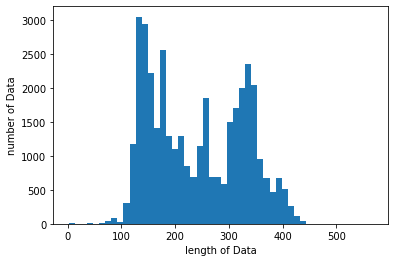

In [111]:
print("제목의 최대 길이 :" , max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  426
제목의 평균 길이 :  103.69126691266912


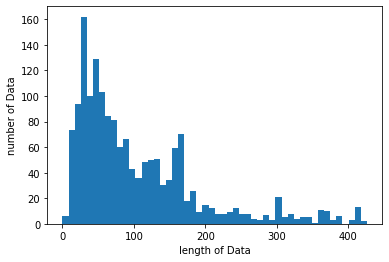

In [112]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(new_df_desen['smishing'])):
  if new_df_desen['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif new_df_desen['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)
# y_train = np.asarray(list(new_df_desen['smishing'])).astype('float32')
# new_df_desen['smishing']

In [116]:
y_train

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 568 # 전체 데이터의 길이를 568로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [119]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32)#, validation_split=0.1)









Epoch 1/5





37406/37406 [==============================] - 1028s 27ms/step - loss: 0.0296 - acc: 0.9931
Epoch 2/5
37406/37406 [==============================] - 1029s 28ms/step - loss: 0.0060 - acc: 0.9984
Epoch 3/5
37406/37406 [==============================] - 1026s 27ms/step - loss: 0.0047 - acc: 0.9989
Epoch 4/5
37406/37406 [==============================] - 1026s 27ms/step - loss: 0.0032 - acc: 0.9993
Epoch 5/5
37406/37406 [==============================] - 1025s 27ms/step - loss: 0.0036 - acc: 0.9995


In [0]:
model.save("model_kb_dacon_02.h5")

In [0]:
predict_smi = model.predict(X_test)

In [129]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=3, batch_size=32)#, validation_split=0.1)

Epoch 1/3
37406/37406 [==============================] - 1045s 28ms/step - loss: 0.0542 - acc: 0.9841
Epoch 2/3
37406/37406 [==============================] - 1039s 28ms/step - loss: 0.0053 - acc: 0.9987
Epoch 3/3
37406/37406 [==============================] - 1049s 28ms/step - loss: 6.1269e-04 - acc: 0.9999


In [0]:
model2.save("model_kb_dacon_03.h5")

In [0]:
mypredict = model2.predict(X_test)

In [132]:
len(mypredict)

1626

In [89]:
with open('./tokenizer.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
X_test = tokenizer.texts_to_sequences(X_test)

AttributeError: ignored

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_len = 568 # 전체 데이터의 길이를 568로 맞춘다
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
from tensorflow.keras.models import load_model
model_kb01 = load_model("model_kb_dacon_01.h5")

In [0]:
mypredict = model_kb01.predict(X_test)

In [95]:
mypredict[0][1]

1.5795231e-06

In [96]:
len(mypredict)

1626

In [94]:
predict_labels = np.argmax(mypredict, axis=1)
predict_labels

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
test_data

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


In [0]:
submission_ids = list(test_data['id'])

In [0]:
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

  

In [0]:
my_result = []

for i in range(len(predict_smi)):
  my_result.append(predict_smi[i][1])


In [0]:
sub_dict = {"id":submission_ids, "smishing":my_result}

In [0]:
submission_df = pd.DataFrame(sub_dict)

In [0]:
submission_df.to_csv("kb_submission_03.csv", index=False, encoding='utf-8')